<a href="https://colab.research.google.com/github/saymrwulf/DigOceanAutomationPipe/blob/main/Yahoo_Finance_and_neural_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This tutorial dives into the intersection of financial data and AI, demonstrating how you can harness the power of Python libraries like yfinance and NeuralForecasting to transform raw stock market data into actionable forecasts.

What We'll Cover:

* We'll start by utilizing yfinance, a powerful tool for downloading historical stock prices and fundamental financial data directly from Yahoo Finance.
* You'll learn how to clean, transform, and structure your financial data to make it AI-ready, setting the stage for model training.
* We'll introduce you to the intuitive NeuralForecasting library, a specialized toolkit designed to streamline the creation of time series forecasting models using neural networks.
* We'll guide you through building and training a neural network model to predict stock prices, showcasing the synergy between financial domain knowledge and AI techniques.


# Prerequisites
But before we start, we need to install the prerequisites.

In [ ]:
!pip install yfinance neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 

# Financial data with Yahoo Finance

In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2015-01-01", end="2023-06-30")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402174,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714722,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716961,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973553,237458000
...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,185.693817,53079300
2023-06-26,186.830002,188.050003,185.229996,185.270004,184.291275,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,187.066528,50730800


In [ ]:
import yfinance as yf
aapl = yf.Ticker('AAPL')
aapl.balance_sheet

,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30
Treasury Shares Number,0.0,NaN,NaN,NaN,NaN
Ordinary Shares Number,15550061000.0,15943425000.0,16426786000.0,16976763000.0,NaN
Share Issued,15550061000.0,15943425000.0,16426786000.0,16976763000.0,NaN
Net Debt,81123000000.0,96423000000.0,89779000000.0,74420000000.0,NaN
Total Debt,111088000000.0,120069000000.0,124719000000.0,112436000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,61555000000.0,48304000000.0,62639000000.0,90943000000.0,NaN
Other Short Term Investments,31590000000.0,24658000000.0,27699000000.0,52927000000.0,NaN
Cash And Cash Equivalents,29965000000.0,23646000000.0,34940000000.0,38016000000.0,NaN
Cash Equivalents,1606000000.0,5100000000.0,17635000000.0,20243000000.0,NaN


In [ ]:
import yfinance as yf
import pandas as pd


# Fetch data for multiple tickers
tickers = ["AAPL", "GOOG", "MSFT"]
data = yf.download(tickers, start="2015-01-01", end="2023-06-30")

# Reshape the data
df = data['Adj Close']  # No need to unstack here

# Convert the Series to a DataFrame if it's not already (optional but recommended)
if isinstance(df, pd.Series):
    df = df.to_frame()

# Melt the dataframe to long format
hist = df.melt(ignore_index=False, var_name='Ticker', value_name='Adj Close')
hist.reset_index(inplace=True)


print(hist)

[*********************100%%**********************]  3 of 3 completed

           Date Ticker   Adj Close
0    2015-01-02   AAPL   24.402174
1    2015-01-05   AAPL   23.714722
2    2015-01-06   AAPL   23.716961
3    2015-01-07   AAPL   24.049517
4    2015-01-08   AAPL   24.973553
...         ...    ...         ...
6406 2023-06-23   MSFT  332.419586
6407 2023-06-26   MSFT  326.049438
6408 2023-06-27   MSFT  331.973083
6409 2023-06-28   MSFT  333.243195
6410 2023-06-29   MSFT  332.449371

[6411 rows x 3 columns]


# Preparing the time-series data


In [ ]:
import pandas as pd

from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS

In [ ]:
hist.rename(columns={'Date': 'ds', 'Ticker': 'unique_id', 'Adj Close':'y'}, inplace=True)
hist.head()

'|    | ds                  | unique_id   |       y |\n|---:|:--------------------|:------------|--------:|\n|  0 | 2015-01-02 00:00:00 | AAPL        | 24.4022 |\n|  1 | 2015-01-05 00:00:00 | AAPL        | 23.7147 |\n|  2 | 2015-01-06 00:00:00 | AAPL        | 23.717  |\n|  3 | 2015-01-07 00:00:00 | AAPL        | 24.0495 |\n|  4 | 2015-01-08 00:00:00 | AAPL        | 24.9736 |'

In [ ]:
horizon = 12

# Try different hyperparmeters to improve accuracy.
models = [NHITS(h=horizon,                      # Forecast horizon
                input_size=2 * horizon,         # Length of input sequence
                max_steps=1000,                 # Number of steps to train
                n_freq_downsample=[2, 1, 1],    # Downsampling factors for each stack output
                mlp_units = 3 * [[1024, 1024]]) # Number of units in each block.
          ]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=hist, val_size=horizon)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 9.6 M  | train
-------------------------------------------------------
9.6 M     Trainable params
0         Non-trainable params
9.6 M     Total params
38.413    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


In [ ]:
Y_hat_insample = nf.predict_insample(step_size=horizon)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
Y_hat_insample.head()

,ds,cutoff,NHITS,y
unique_id,,,,
AAPL,2015-01-05,2014-12-31,-0.071014,23.714722
AAPL,2015-01-06,2014-12-31,-0.015660,23.716961
AAPL,2015-01-07,2014-12-31,0.023161,24.049517
AAPL,2015-01-08,2014-12-31,0.042385,24.973553
AAPL,2015-01-09,2014-12-31,0.140824,25.000345


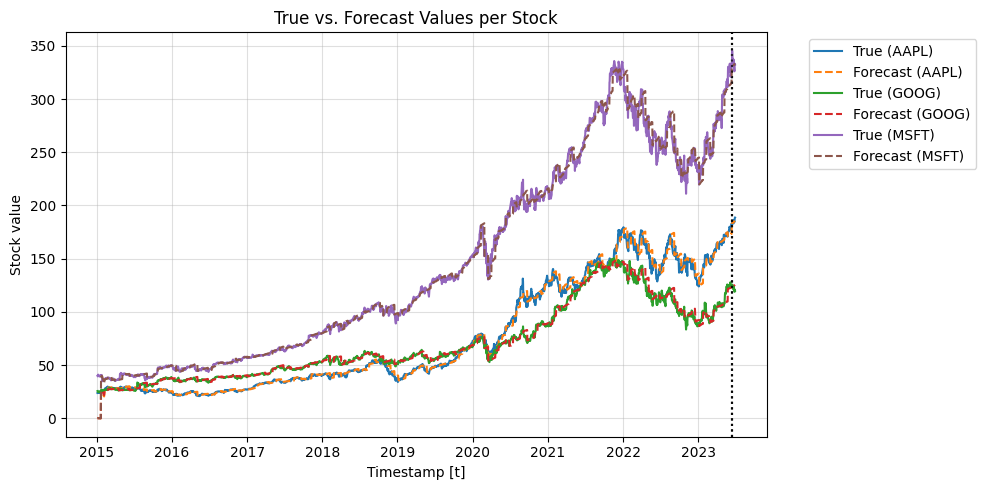

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Iterate through each unique stock using the index
for unique_id in Y_hat_insample.index.unique():
    stock_data = Y_hat_insample.loc[unique_id]  # Index-based selection

    # Plot true values and forecast for the current stock
    plt.plot(stock_data['ds'], stock_data['y'], label=f'True ({unique_id})')
    plt.plot(stock_data['ds'], stock_data['NHITS'], label=f'Forecast ({unique_id})', linestyle='--')  # Dashed line for forecast

    # Mark the train-test split for this stock (if applicable)
    # Assuming the split point is the same for all stocks
    if len(stock_data) > 12:
        plt.axvline(stock_data['ds'].iloc[-12], color='black', linestyle='dotted', alpha=0.7)  # Dotted line for split

# General plot formatting
plt.xlabel('Timestamp [t]')
plt.ylabel('Stock value')
plt.title('True vs. Forecast Values per Stock')
plt.grid(alpha=0.4)  # Less obtrusive grid

# Adjust legend to fit better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Autoformer

In [ ]:
from neuralforecast.models import Autoformer


# Try different hyperparmeters to improve accuracy.
models = [ Autoformer(h=horizon,
                    input_size=horizon,
                    max_steps=1000,
                    val_check_steps=100,
                    early_stop_patience_steps=3)
          ]

nf = NeuralForecast(models=models, freq='M')
nf.fit(df=hist, val_size=horizon)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 148 K  | train
7 | decoder       | Decoder       | 141 K  | train
--------------------------------------------------------


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


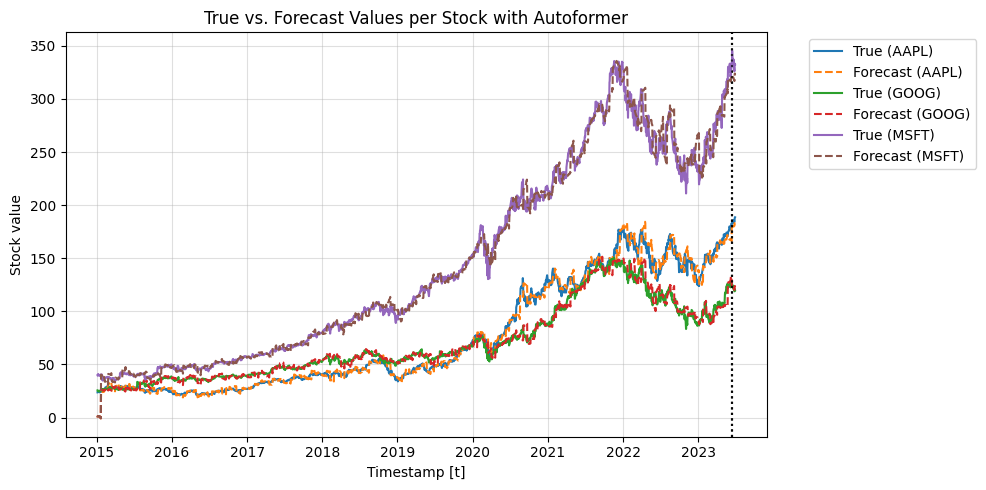

In [ ]:
Y_hat_insample = nf.predict_insample(step_size=horizon)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Iterate through each unique stock using the index
for unique_id in Y_hat_insample.index.unique():
    stock_data = Y_hat_insample.loc[unique_id]  # Index-based selection

    # Plot true values and forecast for the current stock
    plt.plot(stock_data['ds'], stock_data['y'], label=f'True ({unique_id})')
    plt.plot(stock_data['ds'], stock_data['Autoformer'], label=f'Forecast ({unique_id})', linestyle='--')  # Dashed line for forecast

    # Mark the train-test split for this stock (if applicable)
    # Assuming the split point is the same for all stocks
    if len(stock_data) > 12:
        plt.axvline(stock_data['ds'].iloc[-12], color='black', linestyle='dotted', alpha=0.7)  # Dotted line for split

# General plot formatting
plt.xlabel('Timestamp [t]')
plt.ylabel('Stock value')
plt.title('True vs. Forecast Values per Stock with Autoformer')
plt.grid(alpha=0.4)  # Less obtrusive grid

# Adjust legend to fit better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Advanced forecasting with multiple models and tuning

In [ ]:
!pip install statsforecast ray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.7 MB/s eta 0:00:00


In [ ]:
from neuralforecast.auto import AutoNHITS, AutoAutoformer
from neuralforecast.losses.pytorch import MQLoss
from ray import tune


In [ ]:
config_nhits = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "start_padding_enabled": True,
    "n_blocks": 5*[1],                                              # Length of input window
    "mlp_units": 5 * [[64, 64]],                                  # Length of input window
    "n_pool_kernel_size": tune.choice([5*[1], 5*[2], 5*[4],
                                      [8, 4, 2, 1, 1]]),            # MaxPooling Kernel size
    "n_freq_downsample": tune.choice([[8, 4, 2, 1, 1],
                                      [1, 1, 1, 1, 1]]),            # Interpolation expressivity ratios
    "learning_rate": tune.loguniform(1e-4, 1e-2),                   # Initial Learning rate
    "scaler_type": tune.choice([None]),                             # Scaler type
    "max_steps": tune.choice([1000]),                               # Max number of training iterations
    "batch_size": tune.choice([1, 4, 10]),                          # Number of series in batch
    "windows_batch_size": tune.choice([128, 256, 512]),             # Number of windows in batch
    "random_seed": tune.randint(1, 20),                             # Random seed
}
Autoformer(h=horizon,
                    input_size=horizon,
                    max_steps=1000,
                    val_check_steps=100,
                    early_stop_patience_steps=3)
config_autoformer = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "encoder_layers": tune.choice([2,4]),                     # Number of layers in Autoformer
    "learning_rate": tune.loguniform(1e-4, 1e-2),             # Initial Learning rate
    "scaler_type": tune.choice(['robust']),                   # Scaler type
    "max_steps": tune.choice([500, 1000]),                    # Max number of training iterations
    "batch_size": tune.choice([1, 4]),                        # Number of series in batch
    "random_seed": tune.randint(1, 20),                       # Random seed
}

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(
    models=[
        AutoAutoformer(h=48, config=config_autoformer, loss=MQLoss(), num_samples=2),
        AutoNHITS(h=48, config=config_nhits, loss=MQLoss(), num_samples=5),
    ],
    freq='H'
)

In [ ]:
nf.fit(df=hist)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-07-02 15:02:15,120	INFO worker.py:1771 -- Started a local Ray instance.
2024-07-02 15:02:17,231	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2024-07-02_15-02-10   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 2                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2024-07-02_15-02-10
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-02-17/_train_tune_2024-07-02_15-02-10/driver_artifacts`


(_train_tune pid=1806) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=1806) Seed set to 12
(_train_tune pid=1806) GPU available: True (cuda), used: True
(_train_tune pid=1806) TPU available: False, using: 0 TPU cores
(_train_tune pid=1806) HPU available: False, using: 0 HPUs
(_train_tune pid=1806) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-02-17/_train_tune_2024-07-02_15-02-10/working_dirs/_train_tune_0e6fb_00000_0_batch_size=4,encoder_layers=4,input_size=96,learning_rate=0.0028,max_steps=1000,random_seed=12,scaler_ty_2024-07-02_15-02-17/lightning_logs
(_train_tune pid=1806) 2024-07-02 15:02:28.177148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register fa

Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 


(_train_tune pid=1806) /usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
(_train_tune pid=1806)   return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, v_num=0, train_loss_step=0.640, train_loss_epoch=0.624]
(_train_tune pid=1806) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s, v_num=0, train_loss_step=0.591, train_loss_epoch=0.598, valid_loss=4.330]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s, v_num=0, train_loss_step=0.612, train_loss_epoch=0.609, valid_loss=3.890]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, v_num=0, train_loss_step=0.612, train_loss_epoch=0.614, valid_loss=3.850]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, v_num=0, train_loss_step=0.611, train_loss_epoch=0.611, valid_loss=4.300]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s, v_num=0, train_loss_step=0.591, train_loss_epoch=0.57

(_train_tune pid=1806) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s, v_num=0, train_loss_step=0.580, train_loss_epoch=0.557, valid_loss=4.200]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s, v_num=0, train_loss_step=0.580, train_loss_epoch=0.580, valid_loss=3.820]


(_train_tune pid=5749) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=5749) Seed set to 8
(_train_tune pid=5749) GPU available: True (cuda), used: True
(_train_tune pid=5749) TPU available: False, using: 0 TPU cores
(_train_tune pid=5749) HPU available: False, using: 0 HPUs
(_train_tune pid=5749) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-02-17/_train_tune_2024-07-02_15-02-10/working_dirs/_train_tune_0e6fb_00001_1_batch_size=1,encoder_layers=4,input_size=96,learning_rate=0.0003,max_steps=1000,random_seed=8,scaler_typ_2024-07-02_15-02-17/lightning_logs
(_train_tune pid=5749) 2024-07-02 15:17:25.820010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register fac

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 0:   0%|          | 0/3 [00:00<?, ?it/s] 


(_train_tune pid=5749) /usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
(_train_tune pid=5749)   return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 33:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.692, train_loss_epoch=0.654]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=5749) 
Epoch 66:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.651, train_loss_epoch=0.644, valid_loss=4.650]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=5749) 
Epoch 99: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s, v_num=0, train_loss_step=0.615, train_loss_epoch=0.608, valid_loss=5.870]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/3 [00:00<?, ?it/s]
(_train_tune pid=5749) 
Epoch 133:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.571, train_loss_epoch=0.570, valid_loss=6.700]
(_train_tune pid=5749) 
Validation: |          | 0/? [00:00<?, ?it/s]
Vali

(_train_tune pid=5749) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=5749) 
Epoch 333:   0%|          | 0/3 [00:01<?, ?it/s, v_num=0, train_loss_step=0.378, train_loss_epoch=0.378, valid_loss=5.240]


2024-07-02 15:32:29,998	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2024-07-02_15-02-10' in 0.0130s.
INFO:lightning_fabric.utilities.seed:Seed set to 12
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MQLoss        | 5      | eval 
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbeddi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2024-07-02_15-47-29   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 5                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2024-07-02_15-47-29
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-47-29/_train_tune_2024-07-02_15-47-29/driver_artifacts`


(_train_tune pid=13384) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13384) Seed set to 15
(_train_tune pid=13384) GPU available: True (cuda), used: True
(_train_tune pid=13384) TPU available: False, using: 0 TPU cores
(_train_tune pid=13384) HPU available: False, using: 0 HPUs
(_train_tune pid=13384) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-47-29/_train_tune_2024-07-02_15-47-29/working_dirs/_train_tune_0e6f3_00000_0_batch_size=1,input_size=144,learning_rate=0.0016,max_steps=1000,n_freq_downsample=1_1_1_1_1,n_pool_kerne_2024-07-02_15-47-29/lightning_logs
(_train_tune pid=13384) 2024-07-02 15:47:36.867159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to regi

Epoch 33:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.170, train_loss_epoch=1.370]
(_train_tune pid=13384) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 66:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.895, train_loss_epoch=1.320, valid_loss=3.260]
(_train_tune pid=13384) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 85.63it/s, v_num=0, train_loss_step=1.160, train_loss_epoch=1.350, valid_loss=3.790]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 133:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.906, train_loss_epoch=1.280, valid_loss=3.840]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 166:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.908, train_loss_epoch=1.320, valid_loss=3.340]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 3/3 [00:00<00:00, 87.45it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.330, valid

(_train_tune pid=13384) `Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 333:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.898, train_loss_epoch=1.310, valid_loss=3.700]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 333:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.918, train_loss_epoch=0.918, valid_loss=3.460]


(_train_tune pid=13540) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13540) Seed set to 19
(_train_tune pid=13540) GPU available: True (cuda), used: True
(_train_tune pid=13540) TPU available: False, using: 0 TPU cores
(_train_tune pid=13540) HPU available: False, using: 0 HPUs
(_train_tune pid=13540) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-47-29/_train_tune_2024-07-02_15-47-29/working_dirs/_train_tune_0e6f3_00001_1_batch_size=4,input_size=48,learning_rate=0.0002,max_steps=1000,n_freq_downsample=8_4_2_1_1,n_pool_kernel_2024-07-02_15-47-29/lightning_logs
(_train_tune pid=13540) 2024-07-02 15:48:04.791067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to regi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 81.86it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.540]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 79.41it/s, v_num=0, train_loss_step=1.470, train_loss_epoch=1.120, valid_loss=3.390]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 80.78it/s, v_num=0, train_loss_step=1.340, train_loss_epoch=1.440, valid_loss=3.170]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 72.09it/s, v_num=0, train_loss_step=1.450, train_loss_epoch=1.240, valid_loss=3.570]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 83.75it/s, v_num=0, train_loss_step=1.180, train_loss_epoch=1.240, valid_loss=3.240]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 599: 100%|██████████| 1/1 [00:00<00:00, 80.79it/s, v_num=0, train_loss_step=1

(_train_tune pid=13540) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=13700) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13700) Seed set to 5
(_train_tune pid=13700) GPU available: True (cuda), used: True
(_train_tune pid=13700) TPU available: False, using: 0 TPU cores
(_train_tune pid=13700) HPU available: False, using: 0 HPUs
(_train_tune pid=13700) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-47-29/_train_tune_2024-07-02_15-47-29/working_dirs/_train_tune_0e6f3_00002_2_batch_size=4,input_size=48,learning_rate=0.0003,max_steps=1000,n_freq_downsample=1_1_1_1_1,n_pool_kernel_2024-07-02_15-47-29/lightning_logs
(_train_tune pid=13700) 2024-07-02 15:48:34.927481: E external/local_xla/xla/stream_executor/cud

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 60.73it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.250]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=13700) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 76.61it/s, v_num=0, train_loss_step=1.390, train_loss_epoch=1.350, valid_loss=3.420]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 70.96it/s, v_num=0, train_loss_step=1.340, train_loss_epoch=1.390, valid_loss=3.320]
(_train_tune pid=13700) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=13700) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=13700) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 67.57it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.270, valid_loss=3.460]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [0

(_train_tune pid=13700) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=13868) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=13868) Seed set to 13
(_train_tune pid=13868) GPU available: True (cuda), used: True
(_train_tune pid=13868) TPU available: False, using: 0 TPU cores
(_train_tune pid=13868) HPU available: False, using: 0 HPUs
(_train_tune pid=13868) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-47-29/_train_tune_2024-07-02_15-47-29/working_dirs/_train_tune_0e6f3_00003_3_batch_size=1,input_size=96,learning_rate=0.0002,max_steps=1000,n_freq_downsample=1_1_1_1_1,n_pool_kernel_2024-07-02_15-47-29/lightning_logs
(_train_tune pid=13868) 2024-07-02 15:49:07.515916: E external/local_xla/xla/stream_executor/cu

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 33:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=0.948, train_loss_epoch=1.290]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 66:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.770, train_loss_epoch=1.330, valid_loss=3.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 218.44it/s]
(_train_tune pid=13868) 
Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 73.83it/s, v_num=0, train_loss_step=0.934, train_loss_epoch=1.300, valid_loss=3.480]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 133:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.720, train_loss_epoch=1.300, valid_loss=3.420]
(_train_tune pid=13868) 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 166:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.620, train_loss_epoch=1.290, valid_loss=3.380]
(_train_tune pid=13868) 
Validation: |   

(_train_tune pid=13868) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=13868) 
Epoch 333:   0%|          | 0/3 [00:00<?, ?it/s, v_num=0, train_loss_step=1.780, train_loss_epoch=1.780, valid_loss=3.420]


(_train_tune pid=14029) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=14029) Seed set to 6
(_train_tune pid=14029) GPU available: True (cuda), used: True
(_train_tune pid=14029) TPU available: False, using: 0 TPU cores
(_train_tune pid=14029) HPU available: False, using: 0 HPUs
(_train_tune pid=14029) Missing logger folder: /tmp/ray/session_2024-07-02_15-02-10_177781_499/artifacts/2024-07-02_15-47-29/_train_tune_2024-07-02_15-47-29/working_dirs/_train_tune_0e6f3_00004_4_batch_size=4,input_size=48,learning_rate=0.0002,max_steps=1000,n_freq_downsample=8_4_2_1_1,n_pool_kernel_2024-07-02_15-47-29/lightning_logs
(_train_tune pid=14029) 2024-07-02 15:49:36.265930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to regis

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 73.43it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.400]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 81.63it/s, v_num=0, train_loss_step=1.420, train_loss_epoch=1.290, valid_loss=3.350]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 53.82it/s, v_num=0, train_loss_step=1.140, train_loss_epoch=1.210, valid_loss=3.370]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 57.43it/s, v_num=0, train_loss_step=1.270, train_loss_epoch=1.410, valid_loss=3.300]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 147.43it/s]
(_train_tune pid=14029) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 83.12it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.200, valid_loss=3.360]
Validation: |          | 0/? [00

(_train_tune pid=14029) `Trainer.fit` stopped: `max_steps=1000` reached.
2024-07-02 15:49:57,411	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2024-07-02_15-47-29' in 0.0258s.
INFO:lightning_fabric.utilities.seed:Seed set to 6
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 87.9 K | train
----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


In [ ]:
fcst_df = nf.predict()
fcst_df.columns = fcst_df.columns.str.replace('-median', '')
fcst_df.head()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoAutoformer,AutoAutoformer-lo-90,AutoAutoformer-lo-80,AutoAutoformer-hi-80,AutoAutoformer-hi-90,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90
unique_id,,,,,,,,,,,
AAPL,2023-06-29 01:00:00,190.398529,155.068130,162.028778,202.378662,209.824539,188.260956,182.603180,183.928665,192.883194,194.224838
AAPL,2023-06-29 02:00:00,186.219437,151.366287,159.187775,198.840683,205.766113,188.188828,181.993439,183.493530,193.590332,195.179703
AAPL,2023-06-29 03:00:00,185.615143,152.556686,159.271210,198.905212,206.410217,188.539566,179.918808,182.094406,195.174179,197.225632
AAPL,2023-06-29 04:00:00,185.687378,155.088577,161.689789,203.305573,211.758148,189.119781,178.536438,180.931305,196.296921,198.883453
AAPL,2023-06-29 05:00:00,185.591812,152.921661,159.712082,201.100281,209.947205,189.268997,178.310135,180.844345,196.979553,200.027374


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1386: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


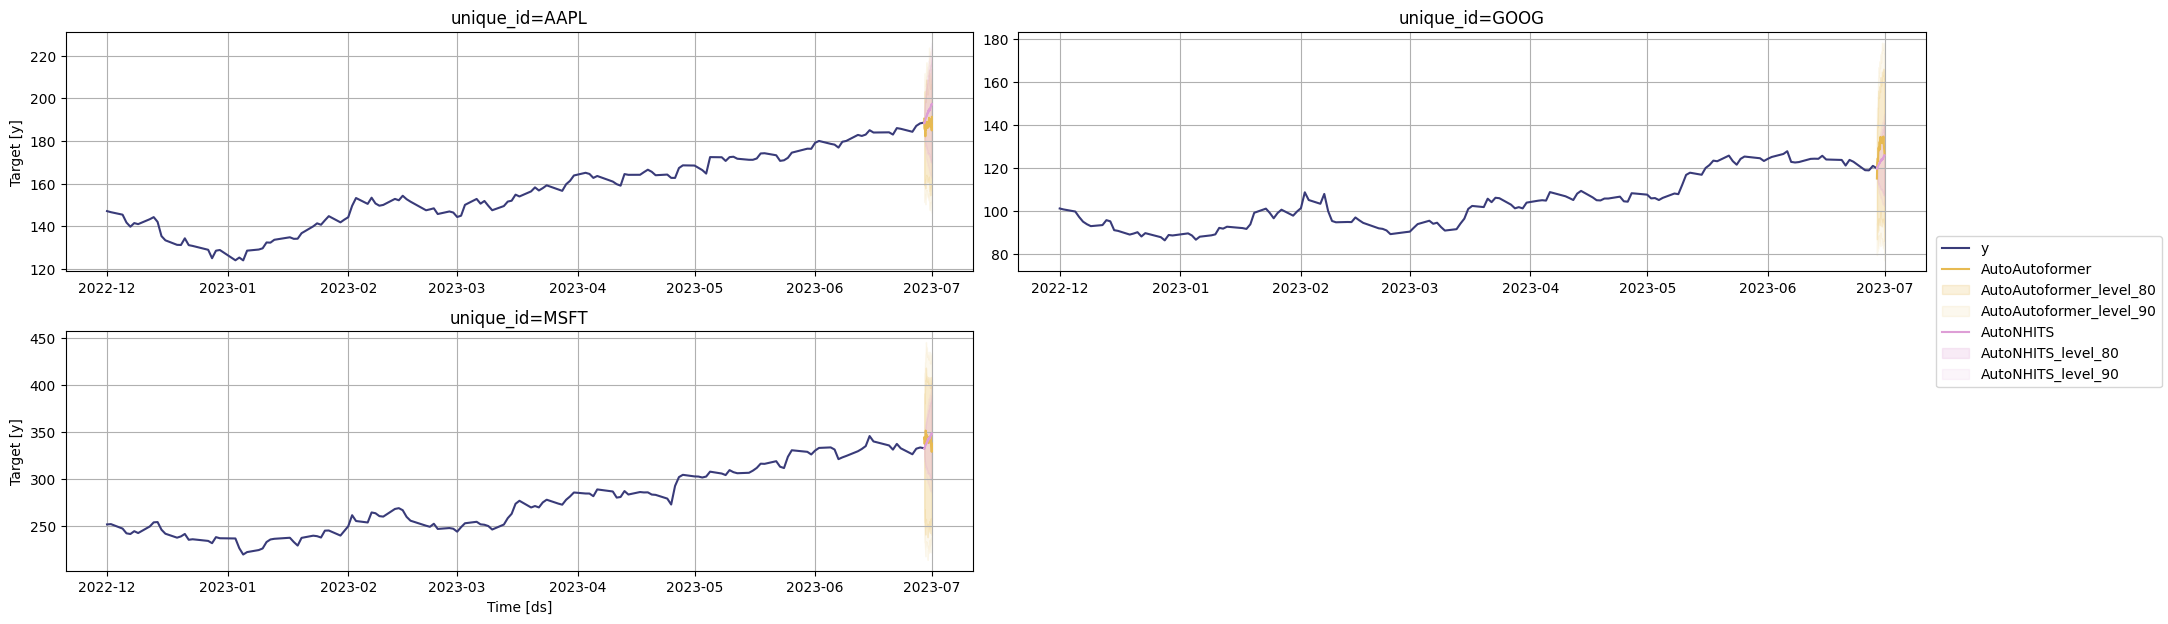

In [ ]:
from statsforecast import StatsForecast
StatsForecast.plot(hist, fcst_df, engine='matplotlib', max_insample_length=48 * 3, level=[80, 90])

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1386: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


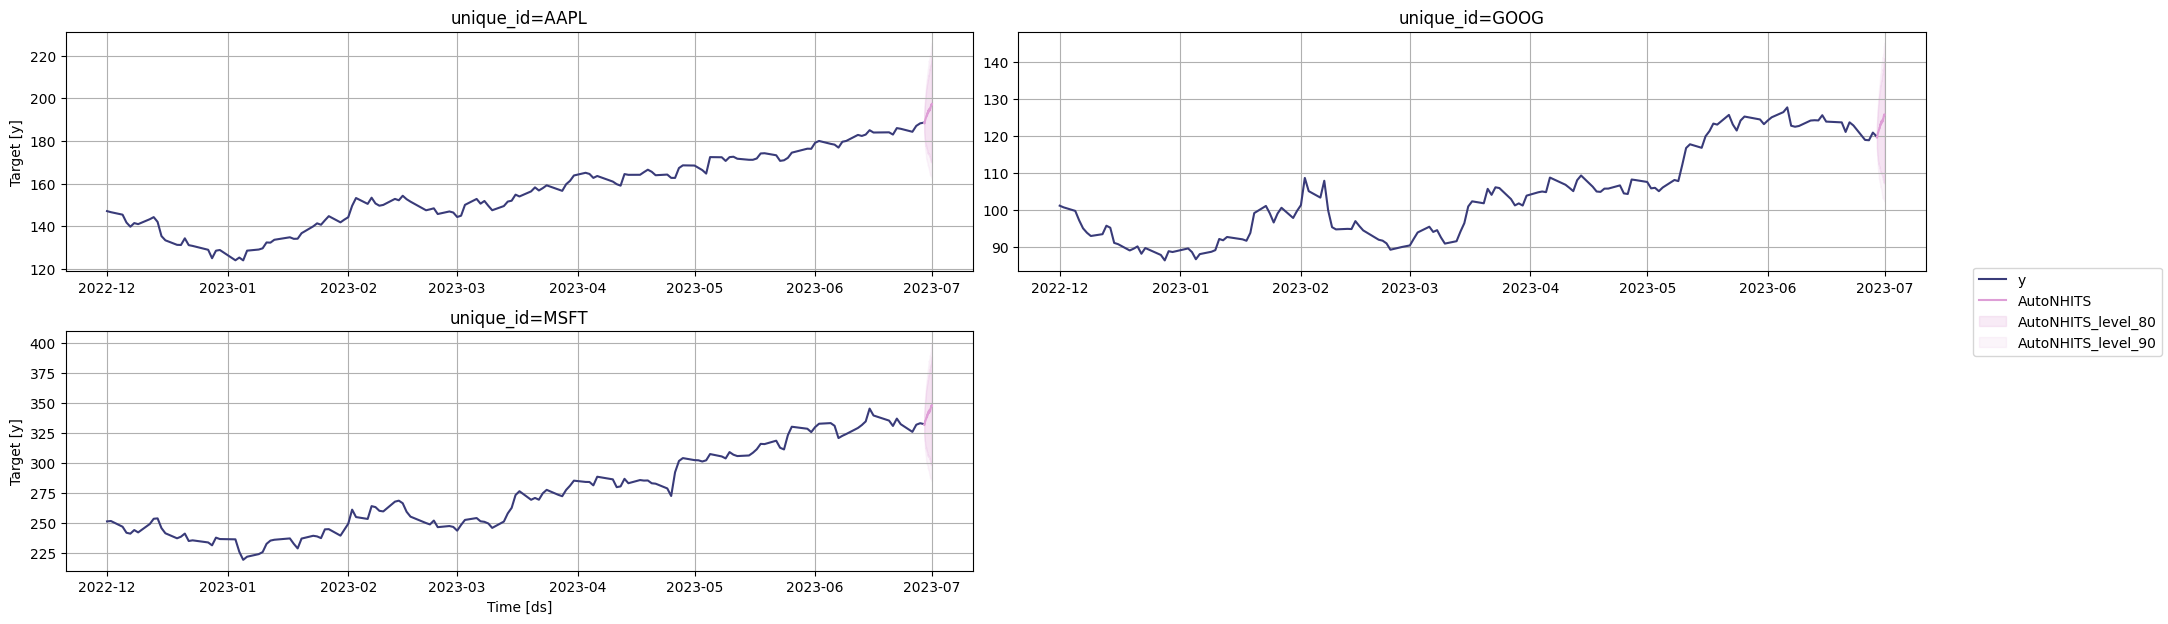

In [ ]:
StatsForecast.plot(hist, fcst_df, models=["AutoNHITS"], engine='matplotlib', max_insample_length=48 * 3, level=[80, 90])

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1386: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


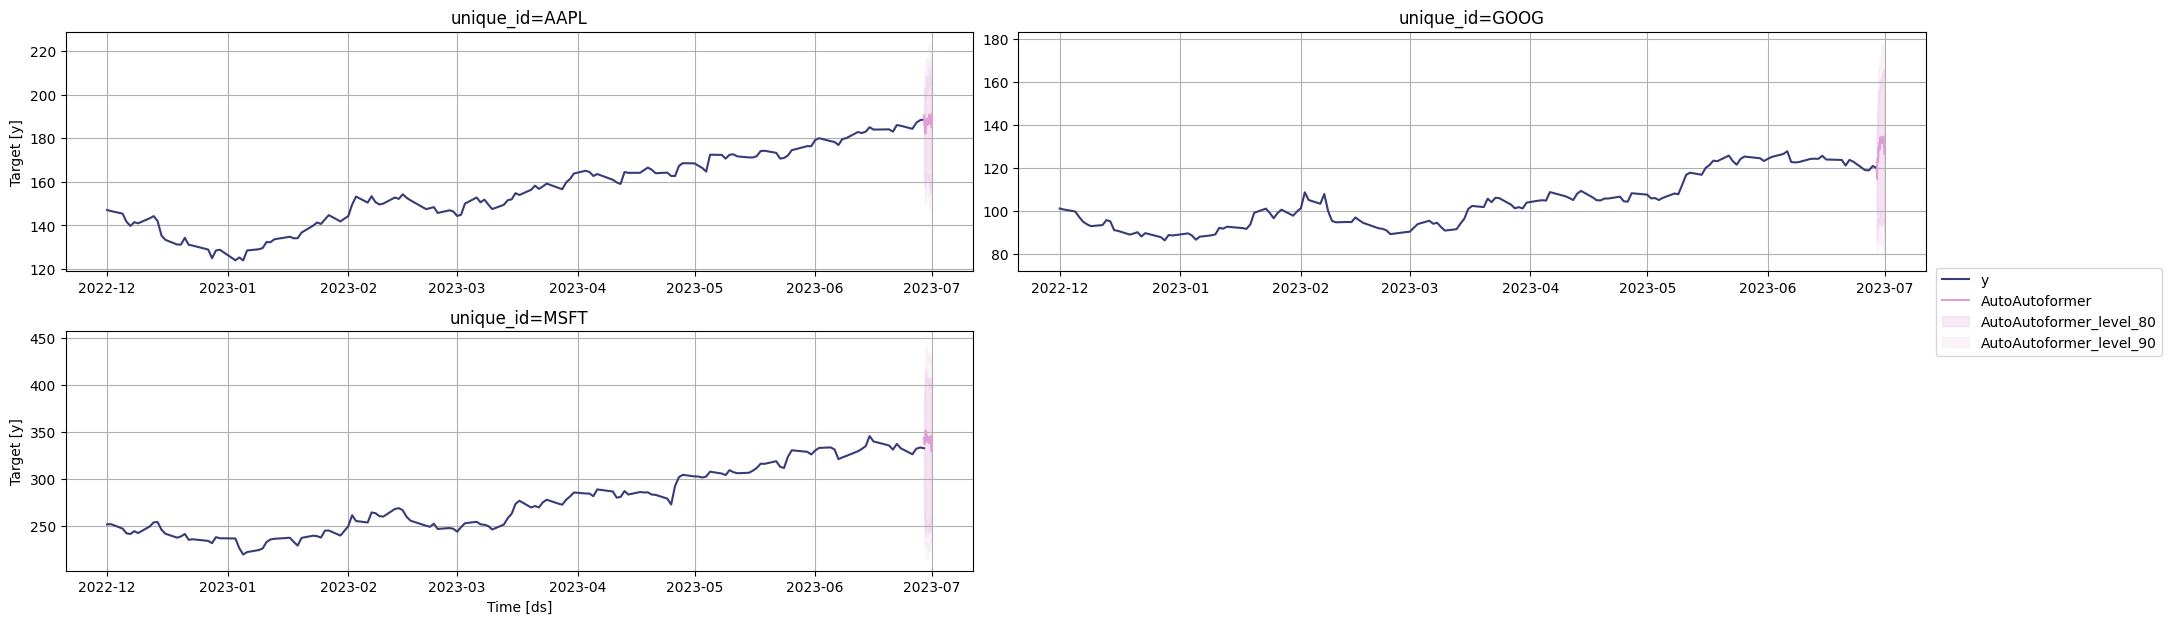

In [ ]:
StatsForecast.plot(hist, fcst_df, models=["AutoAutoformer"], engine='matplotlib', max_insample_length=48 * 3, level=[80, 90])